In [1]:
import requests
import torch
from io import BytesIO
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from diffusers import StableDiffusionInpaintPipeline

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pipe = StableDiffusionInpaintPipeline.from_pretrained("stabilityai/stable-diffusion-2-inpainting", torch_dtype=torch.float16)
pipe = pipe.to("cuda", torch.float16)

Loading pipeline components...: 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]


In [3]:
inp = Image.open("media/batik_2.png")
mask = Image.open("media/batik_2_mask.png").convert("L")

In [14]:
prompt = "a close up of a brown and orange background, blurred and dreamy illustration, ecstasy, tonalism illustration, very coherent image, silk, distorted photo, inspired by Georg Schrimpf, inspired by Sargent Johnson, background image, blurry and dreamy illustration, without duplicate image, phone wallpaper"
image = pipe(prompt=" ", 
             image=inp, 
             mask_image=mask, 
             strength=1, 
             num_inference_steps=30,
             num_images_per_prompt=1, 
             width=inp.width, 
             height=inp.height,
             guidance_scale=0).images

100%|██████████| 30/30 [00:02<00:00, 12.37it/s]


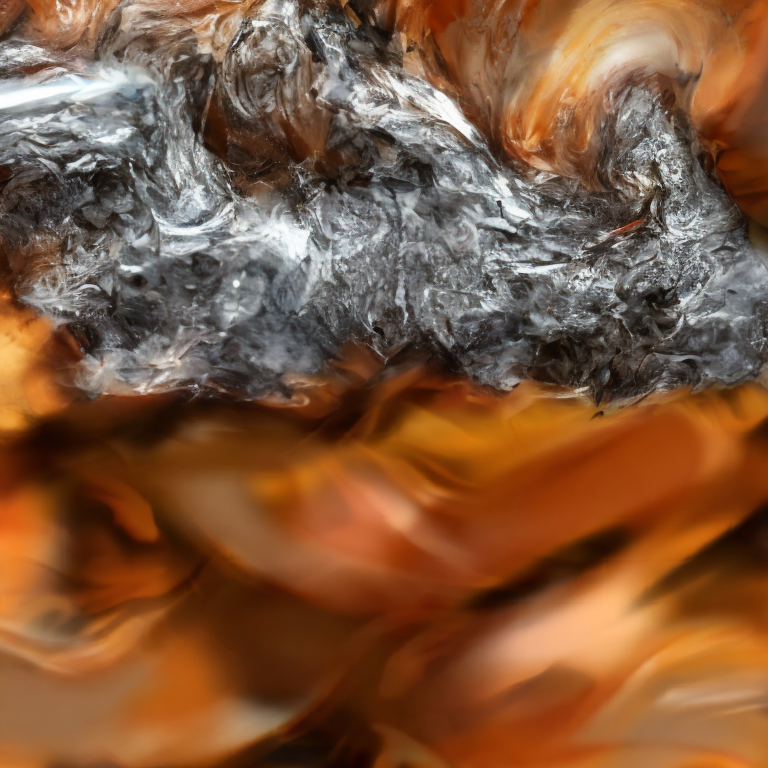

In [15]:
image[0].show()
image[0].save("output.png")